In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.offline

In [ ]:
def catscatter(df,colx,coly,cols,color=['grey','black'],ratio=10,font='Helvetica',save=False,save_name='Default'):
    colx_codes=dict(zip(df[colx].sort_values().unique(),range(len(df[colx].unique()))))
    coly_codes=dict(zip(df[coly].sort_values(ascending=False).unique(),range(len(df[coly].unique()))))

    df[colx]=df[colx].apply(lambda x: colx_codes[x])
    df[coly]=df[coly].apply(lambda x: coly_codes[x])

    plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
    plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
    plt.rcParams['font.sans-serif']=font
    plt.rcParams['xtick.color']=color[-1]
    plt.rcParams['ytick.color']=color[-1]
    plt.box(False)


    for num in range(len(coly_codes)):
        plt.hlines(num,-1,len(colx_codes)+1,linestyle='dashed',linewidth=1,color=color[num%2],alpha=0.5)
    for num in range(len(colx_codes)):
        plt.vlines(num,-1,len(coly_codes)+1,linestyle='dashed',linewidth=1,color=color[num%2],alpha=0.5)

    plt.scatter(df[colx],
               df[coly],
               s=df[cols]*ratio,
               zorder=2,
               color=color[-1])

    plt.xticks(ticks=list(colx_codes.values()),labels=colx_codes.keys(),rotation=90)
    plt.yticks(ticks=list(coly_codes.values()),labels=coly_codes.keys())
    plt.xlim(xmin=-1,xmax=len(colx_codes))
    plt.ylim(ymin=-1,ymax=len(coly_codes))


In [ ]:
df = pd.read_csv("/content/diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df['Outcome'] = df['Outcome'].astype('category',copy=False)

# Convert 0/1 values to 'Yes'/'No'
def convert_outcome(x):
    if x == 1:
        return 'Yes'
    else:
        return 'No'

df['Outcome'] = df['Outcome'].apply(convert_outcome)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [ ]:
fig = make_subplots(rows=2, cols=4, subplot_titles=('<b>Distribution of Pregnancies</b>',
                                                    '<b>Distribution of Glucose</b>',
                                                    '<b>Distribution of Blood Pressure</b>',
                                                    '<b>Distribution of Skin Thickness</b>',
                                                    '<b>Distribution of Insulin</b>',
                                                    '<b>Distribution of BMI</b>',
                                                    '<b>Distribution of Diabetes Pedigree Func.</b>',
                                                    '<b>Distribution of Age</b>'
                                                   ))

fig.add_trace(go.Histogram(x=df['Pregnancies']), row=1, col=1)
fig.add_trace(go.Histogram(x=df['Glucose']), row=1, col=2)
fig.add_trace(go.Histogram(x=df['BloodPressure']), row=1, col=3)
fig.add_trace(go.Histogram(x=df['SkinThickness']), row=1, col=4)
fig.add_trace(go.Histogram(x=df['Insulin']), row=2, col=1)
fig.add_trace(go.Histogram(x=df['BMI']), row=2, col=2)
fig.add_trace(go.Histogram(x=df['DiabetesPedigreeFunction']), row=2, col=3)
fig.add_trace(go.Histogram(x=df['Age']), row=2, col=4)


# Update visual layout
fig.update_layout(
    showlegend=False,
    width=1000,
    height=400,
    autosize=False,
    margin=dict(t=15, b=0, l=5, r=5),
    template="plotly_white",
)

# update font size at the axes
fig.update_coloraxes(colorbar_tickfont_size=10)
# Update font in the titles: Apparently subplot titles are annotations (Subplot font size is hardcoded to 16pt · Issue #985)
fig.update_annotations(font_size=12)
# Reduce opacity
fig.update_traces(opacity=0.75)

fig.show()

<Axes: >

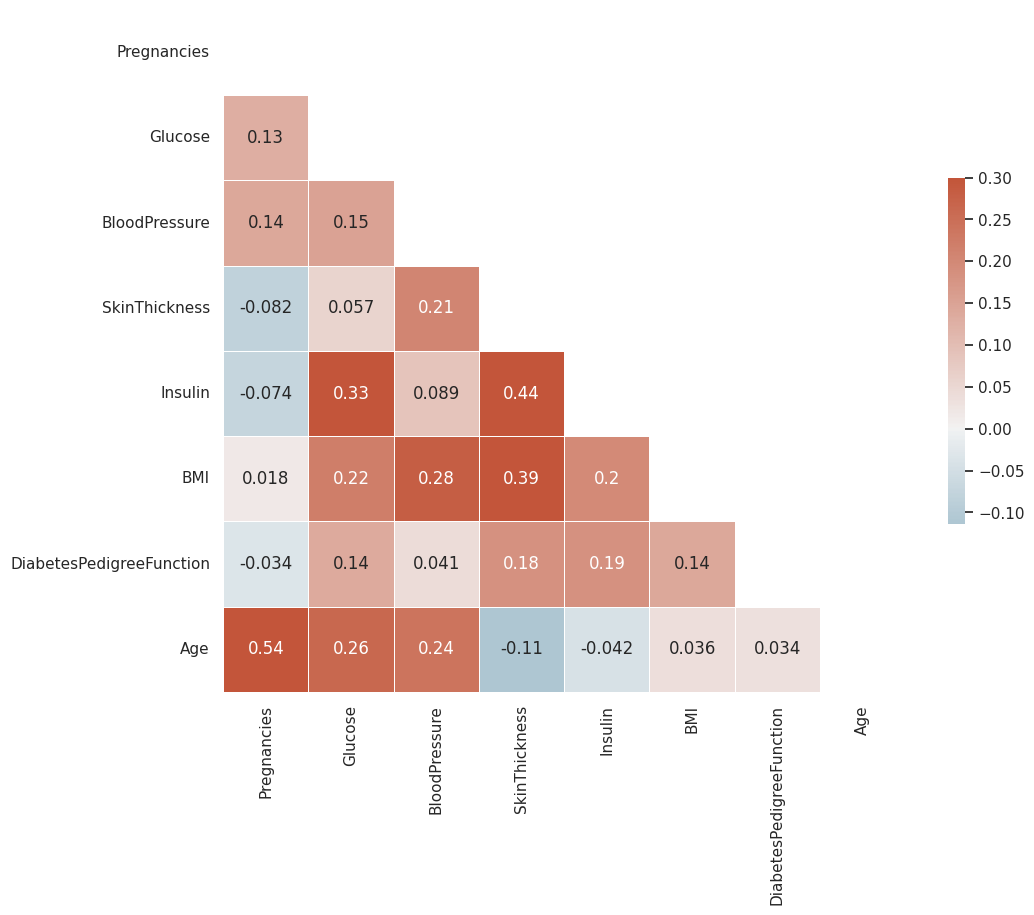

In [ ]:
sns.set_theme(style="white")

# make a dataframe with only numberic variables, without 'Outcome'
d = df.drop(['Outcome'], axis=1)

# Compute the correlation matrix for numeric features
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
dfg = df['Outcome'].value_counts().reset_index()
dfg.columns = ['Outcome', 'Quantity']
fig = px.bar(dfg, x='Outcome', y='Quantity', title='Quantity of Patients by Outcome' )
fig.show()

In [ ]:
fig = make_subplots(rows=2, cols=4, subplot_titles=('<b>Outcome vs. Pregnancies</b>',
                                                    '<b>Outcome vs. Glucose</b>',
                                                    '<b>Outcome vs. Blood Pressure</b>',
                                                    '<b>Outcome vs. Skin Thickness</b>',
                                                    '<b>Outcome vs. Insulin</b>',
                                                    '<b>Outcome vs. BMI</b>',
                                                    '<b>Outcome vs. Diabetes Pedigree Func.</b>',
                                                    '<b>Outcome vs. Age</b>'
                                                   ))

fig.add_trace(go.Box(y=df['Pregnancies'], x=df['Outcome']), row=1, col=1)
fig.add_trace(go.Box(y=df['Glucose'], x=df['Outcome']), row=1, col=2)
fig.add_trace(go.Box(y=df['BloodPressure'], x=df['Outcome']), row=1, col=3)
fig.add_trace(go.Box(y=df['SkinThickness'], x=df['Outcome']), row=1, col=4)
fig.add_trace(go.Box(y=df['Insulin'], x=df['Outcome']), row=2, col=1)
fig.add_trace(go.Box(y=df['BMI'], x=df['Outcome']), row=2, col=2)
fig.add_trace(go.Box(y=df['DiabetesPedigreeFunction'], x=df['Outcome']), row=2, col=3)
fig.add_trace(go.Box(y=df['Age'], x=df['Outcome']), row=2, col=4)


# Update visual layout
fig.update_layout(
    showlegend=False,
    width=1000,
    height=400,
    autosize=False,
    margin=dict(t=15, b=0, l=5, r=5),
    template="plotly_white",
)

# update font size at the axes
fig.update_coloraxes(colorbar_tickfont_size=10)
# Update font in the titles: Apparently subplot titles are annotations (Subplot font size is hardcoded to 16pt · Issue #985)
fig.update_annotations(font_size=12)
# Reduce opacity
fig.update_traces(opacity=0.75)

fig.show()

In [ ]:
# build the clustering model
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# clustering dataset - we  will reuse d (the dataset of numeric features)
X = StandardScaler().fit_transform(d)
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [ ]:
neigh = NearestNeighbors(n_neighbors=8)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

# next, we sort and plot the results
distances = np.sort(distances, axis=0)
distances = distances[:,1]

In [ ]:
fig = px.scatter(
    distances,
    title='Distance Curve')
fig.update_xaxes(title_text='Distances')
fig.update_yaxes(title_text='Distance threashold (espsilon)')
fig.update_layout(showlegend=False)
fig.show()

In [ ]:
# Compute DBSCAN
db = DBSCAN(eps=1.8268, min_samples=8).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 2
Estimated number of noise points: 81
Silhouette Coefficient: 0.252


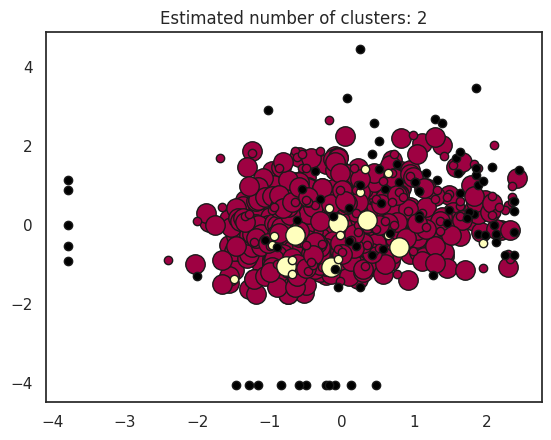

In [33]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 1], xy[:, 5], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 1], xy[:, 5], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()